### 🪄 This is a personal project of mine which aims to analyze airbnb data in Athens. Within this data we will run pattern recognition algorithms, and create some models for the purpose of prediction and classification.

##### 1. We start by loading the raw data from the "inside Airbnb" website (https://data.insideairbnb.com/greece/attica/athens/2025-09-26/data/listings.csv.gz) and take a first look at our data.
###### If the link abive doesn't work use this (https://drive.google.com/file/d/1nuhqm3dId7OrzsOO2QuK7L7bCpqav1He/view?usp=sharing)

In [1]:
import pandas as pd
import numpy  as np


air_data = pd.read_csv("airbnb_raw_data.csv")
air_data.info()
air_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584 entries, 0 to 15583
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15584 non-null  int64  
 1   listing_url                                   15584 non-null  object 
 2   scrape_id                                     15584 non-null  int64  
 3   last_scraped                                  15584 non-null  object 
 4   source                                        15584 non-null  object 
 5   name                                          15584 non-null  object 
 6   description                                   15247 non-null  object 
 7   neighborhood_overview                         7509 non-null   object 
 8   picture_url                                   15584 non-null  object 
 9   host_id                                       15584 non-null 

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.558400e+04,1.558400e+04,1.558400e+04,15572.000000,15572.000000,0.0,15584.000000,15584.000000,15584.000000,14527.000000,...,13241.000000,13241.000000,13241.000000,13241.000000,13241.000000,15584.000000,15584.000000,15584.000000,15584.000000,13241.000000
mean,7.701253e+17,2.025093e+13,2.851131e+08,34.963524,46.137490,NaN,37.979571,23.731338,3.720033,1.202588,...,4.777037,4.859688,4.861588,4.692962,4.728751,18.083291,17.002310,0.996856,0.030416,1.736433
std,5.584347e+17,3.906375e-03,2.199127e+08,94.681896,163.919035,NaN,0.012920,0.012274,1.944944,0.541814,...,0.385488,0.301281,0.328573,0.425825,0.392592,30.714957,30.425216,4.231439,0.526131,1.758363
min,2.726200e+04,2.025093e+13,3.717700e+04,1.000000,1.000000,NaN,37.949625,23.700809,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.745777e+07,2.025093e+13,7.979395e+07,2.000000,2.000000,NaN,37.968825,23.724020,2.000000,1.000000,...,4.730000,4.850000,4.860000,4.590000,4.670000,1.000000,1.000000,0.000000,0.000000,0.400000
50%,9.419307e+17,2.025093e+13,2.295268e+08,7.000000,8.000000,NaN,37.978369,23.729620,4.000000,1.000000,...,4.890000,4.940000,4.960000,4.820000,4.830000,5.000000,4.000000,0.000000,0.000000,1.100000
75%,1.253467e+18,2.025093e+13,4.882134e+08,28.000000,33.000000,NaN,37.986958,23.736811,4.000000,1.000000,...,5.000000,5.000000,5.000000,4.960000,4.930000,19.000000,18.000000,0.000000,0.000000,2.560000
max,1.517622e+18,2.025093e+13,7.196119e+08,1457.000000,8774.000000,NaN,38.030830,23.780220,16.000000,12.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,165.000000,165.000000,40.000000,13.000000,13.110000


### 💡🎨 We will do some preprocessing on our raw data

##### ❗ The "price" column has data in object format and contains special characters that we need to remove. These are "$" and ",". We do a similar process for the column "host_response_rate"

In [2]:
# Remove "$" and ","
air_data["price"]              = air_data["price"].str.replace("$","").str.replace(",","")

# Convert "object" to "float"
air_data["price"]              = air_data["price"].astype(float)

# We do the same thing in one line
air_data["host_response_rate"] = air_data["host_response_rate"].str.replace("%", "").astype(float)

##### 📐 Calculation of the distance of each AirBNB from Syntagma, using the "latitude" and "longitude" columns

In [3]:
latitude_dif_syn       = air_data["latitude"]  - 37.9755               
longitude_dif_syn      = air_data["longitude"] - 23.7349
mean_distance_syn      = np.deg2rad(air_data["latitude"] + 37.9755) / 2

dist_lat_syntagma      = latitude_dif_syn  * (np.pi / 180) * 6371
dist_long_syntagma     = np.deg2rad(longitude_dif_syn) * 6371 * np.cos(mean_distance_syn)

distance_from_syntagma = np.sqrt(np.power(dist_lat_syntagma, 2) + np.power(dist_long_syntagma, 2))

print(distance_from_syntagma.describe())

air_data["distance_from_syntagma"] = distance_from_syntagma

count    15584.000000
mean         1.635702
std          0.920888
min          0.028757
25%          0.990613
50%          1.486632
75%          2.096686
max          6.200870
dtype: float64


##### 💡 I notice that within our data, there is the exact first hosting date on the Airbnb platform. I will take these dates and convert them into days, as a reference day it will be the most recent day that the scrap was made

In [4]:
date_of_last_scraped   = pd.to_datetime(air_data["last_scraped"])
date_of_first_host     = pd.to_datetime(air_data["host_since"])
date_of_last_review    = pd.to_datetime(air_data["first_review"])
date_of_first_review   = pd.to_datetime(air_data["last_review"])

# Calculation of reference date.
reference_date         = date_of_last_scraped.max()

# Calculation of total days for each of the three categories
days_been_active       = (reference_date - date_of_first_host).dt.days
days_from_last_review  = (reference_date - date_of_first_review).dt.days
days_from_first_review = (reference_date - date_of_last_review).dt.days

print(days_been_active.describe())
print(days_from_last_review.describe())
print(days_from_first_review.describe())

count    15572.000000
mean      2313.718084
std       1357.928056
min          9.000000
25%       1044.000000
50%       2486.000000
75%       3382.000000
max       5863.000000
Name: host_since, dtype: float64
count    13241.000000
mean       171.373386
std        365.306081
min          1.000000
25%         12.000000
50%         27.000000
75%        138.000000
max       4111.000000
Name: last_review, dtype: float64
count    13241.000000
mean      1138.111094
std        995.794221
min          1.000000
25%        378.000000
50%        810.000000
75%       1667.000000
max       5443.000000
Name: first_review, dtype: float64


##### 📥 We add this additional information into our data

In [5]:
air_data["days_been_active"]       = days_been_active
air_data["days_from_last_review"]  = days_from_last_review
air_data["days_from_first_review"] = days_from_first_review

##### 🪖 We are creating a function that can do one-hot encoding for binary and non-binary data.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose       import ColumnTransformer             as ColTrans
from sklearn.impute        import SimpleImputer
from sklearn.pipeline      import Pipeline


def one_hot_thing(df, bin_cols, non_bin_cols, num_cols):
                        
    # Using pipeline for binary mapping
    binary_pipeline     = Pipeline([
        ("imputer", SimpleImputer(strategy = "most_frequent")),
        ("encoder", OrdinalEncoder())
    ])

    # Using pipeline for One-Hot
    non_binary_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy = "constant", fill_value     = "missing")),
        ("encoder", OneHotEncoder(handle_unknown = "ignore", drop = "first"))
    ])

    # Using pipiline for Numerical Values
    numeric_pipeline    = Pipeline([
        ("imputer", SimpleImputer(strategy = "median"))
    ])

    # Transformation that joins these two mappings
    trans               = ColTrans(
        transformers    = [
            ("bin", binary_pipeline, bin_cols),
            ("cat", non_binary_pipeline, non_bin_cols),
            ("num", numeric_pipeline, num_cols)
        ],
        remainder                 = "drop", # The drop is necessary to preserve the columns that our transformer will not process.
        verbose_feature_names_out = False
    )

    # Application to data
    data_transformed    = trans.fit_transform(df)
    new_column_names    = trans.get_feature_names_out()
    df_final            = pd.DataFrame(data_transformed, columns = new_column_names)

    row_of_final, col_of_final = df_final.shape
    print(f"The final data frame has {col_of_final} columns and {row_of_final} rows")

    return df_final


### 🗃️ The initial raw data will be approached in two ways:
### 1. In the first, the data will be selected manually, based on human logic.
### 2. In the second, the data will be filtered appropriately so that as little information as possible is lost.

#### 1️⃣ Manually selecting data

In [7]:
air_data_cl = air_data[["host_response_time",
                        "host_response_rate",
                        "host_is_superhost",
                        "latitude",
                        "longitude",
                        "room_type",
                        "accommodates",
                        "bathrooms",
                        "bedrooms",
                        "price",
                        "review_scores_rating",
                        "reviews_per_month",
                        "distance_from_syntagma",
                        "days_been_active",
                        "days_from_last_review",
                        "days_from_first_review"]].copy()

rows_, columns_ = air_data_cl.shape
print(f"Our new data frame has {rows_} and {columns_} columns")
print(air_data_cl.info())

Our new data frame has 15584 and 16 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584 entries, 0 to 15583
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_time      13812 non-null  object 
 1   host_response_rate      13812 non-null  float64
 2   host_is_superhost       14656 non-null  object 
 3   latitude                15584 non-null  float64
 4   longitude               15584 non-null  float64
 5   room_type               15584 non-null  object 
 6   accommodates            15584 non-null  int64  
 7   bathrooms               14527 non-null  float64
 8   bedrooms                15482 non-null  float64
 9   price                   14524 non-null  float64
 10  review_scores_rating    13241 non-null  float64
 11  reviews_per_month       13241 non-null  float64
 12  distance_from_syntagma  15584 non-null  float64
 13  days_been_active        15572 non-null  float64

##### 🔍 We observe that the columns: "host_response_time", "host_is_superhost" and "room_type" are has items with object data type

In [8]:
air_data_cl[["host_response_time", "host_is_superhost", "room_type"]].describe()

,host_response_time,host_is_superhost,room_type
count,13812,14656,15584
unique,4,2,4
top,within an hour,f,Entire home/apt
freq,12526,7827,14414


##### We use the function "one_hot_thing" appropriately

In [9]:
air_data_cl = air_data_cl.dropna(subset = ["price"])

temp_num    = air_data_cl.drop(["host_is_superhost", "host_response_time", "room_type"], axis = "columns").columns

air_data_cl = one_hot_thing(air_data_cl, 
                            ["host_is_superhost"],               # binary     columns
                            ["host_response_time", "room_type"], # non-binary columns
                            temp_num)                            # numeric    columns


The final data frame has 21 columns and 14524 rows


##### 👁️ Let's take a look at the new data frame we created.

In [10]:
grammes, stiles = air_data_cl.shape
print(f"The new data framework has {grammes} rows and {stiles} columns")
air_data_cl.info()
air_data_cl.describe()

The new data framework has 14524 rows and 21 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14524 entries, 0 to 14523
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   host_is_superhost                      14524 non-null  float64
 1   host_response_time_missing             14524 non-null  float64
 2   host_response_time_within a day        14524 non-null  float64
 3   host_response_time_within a few hours  14524 non-null  float64
 4   host_response_time_within an hour      14524 non-null  float64
 5   room_type_Hotel room                   14524 non-null  float64
 6   room_type_Private room                 14524 non-null  float64
 7   room_type_Shared room                  14524 non-null  float64
 8   host_response_rate                     14524 non-null  float64
 9   latitude                               14524 non-null  float64
 10  longitude        

,host_is_superhost,host_response_time_missing,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_response_rate,latitude,...,accommodates,bathrooms,bedrooms,price,review_scores_rating,reviews_per_month,distance_from_syntagma,days_been_active,days_from_last_review,days_from_first_review
count,14524.000000,14524.000000,14524.000000,14524.000000,14524.000000,14524.000000,14524.000000,14524.000000,14524.000000,14524.000000,...,14524.000000,14524.000000,14524.000000,14524.000000,14524.000000,14524.000000,14524.000000,14524.000000,14524.000000,14524.000000
mean,0.449945,0.097563,0.025613,0.043032,0.821743,0.003098,0.063894,0.002754,97.597838,37.979420,...,3.735197,1.202630,1.393074,122.899821,4.786074,1.697068,1.626855,2324.935073,140.045098,1087.236023
std,0.497505,0.296733,0.157983,0.202937,0.382742,0.055578,0.244573,0.052409,11.103762,0.012872,...,1.941469,0.541862,0.852753,452.296317,0.337343,1.660492,0.920455,1357.298754,331.428604,928.303521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.949625,...,1.000000,0.000000,0.000000,9.000000,1.000000,0.010000,0.028757,9.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,37.968736,...,2.000000,1.000000,1.000000,54.000000,4.750000,0.530000,0.983589,1045.000000,13.000000,435.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,37.978240,...,4.000000,1.000000,1.000000,78.000000,4.870000,1.160000,1.476265,2498.000000,25.000000,808.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,37.986727,...,4.000000,1.000000,2.000000,119.000000,4.960000,2.320000,2.084290,3388.000000,93.000000,1468.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,38.030830,...,16.000000,12.000000,14.000000,38000.000000,5.000000,13.110000,6.200870,5657.000000,4111.000000,5443.000000


##### 📔 Statistical Analysis

##### I notice that the "price" column has a large standard deviation and I even see that there are some extreme values ​​that may cause us problems later on. For this reason, I will represent this data with the help of a boxplot and a histogram, so that we can visually see the anomalies observed in the numbers above.

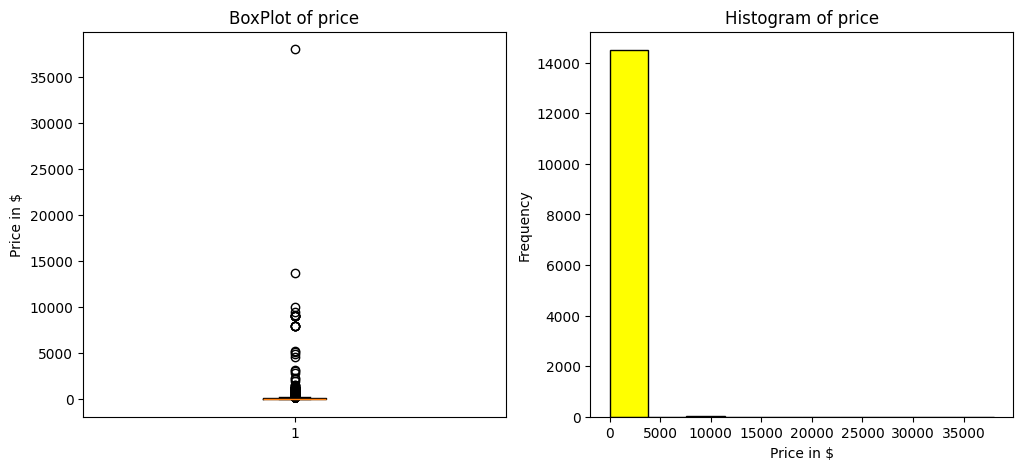

In [11]:
import matplotlib.pyplot as plt

working_class              = "price"
price_plot, (plot1, plot2) = plt.subplots(1, 2, figsize = (12,5))

plot1.boxplot(air_data_cl[working_class].dropna())
plot1.set_title(f"BoxPlot of {working_class}")
plot1.set_xlabel("")
plot1.set_ylabel("Price in $")

plot2.hist(air_data_cl[working_class].dropna(), color = "yellow", edgecolor = "black")
plot2.set_xlabel("Price in $")
plot2.set_ylabel("Frequency")
plot2.set_title(f"Histogram of {working_class}")

plt.show()

##### ⌨️ It is obvious that there are outliers that should be removed from our data. So creating an outlier removal function is necessary.

In [12]:
def outlier_elimination(df, target_col):
    p25               = df[target_col].quantile(0.25)
    p75               = df[target_col].quantile(0.75)

    upper             = p75 + 1.5 * (p75 - p25)
    lower             = p25 - 1.5 * (p75 - p25)

    upper_killer      = df[target_col] <= upper
    lower_killer      = df[target_col] >= lower

    outlier_elim      = upper_killer * lower_killer

    new_df            = df[outlier_elim]

    new_row, new_cols = new_df.shape
    old_row, old_cils = df.shape

    print(f"{((old_row - new_row) * 100) / old_row:.2f}% of rows has removed")
    
    return new_df

##### 💣 Now the outlier removal function is applied

In [13]:
air_data_cl1 = outlier_elimination(air_data_cl, "price")


8.34% of rows has removed


##### 👁️ I repeat the process of visualizing the data in the price column after removing the outliers.

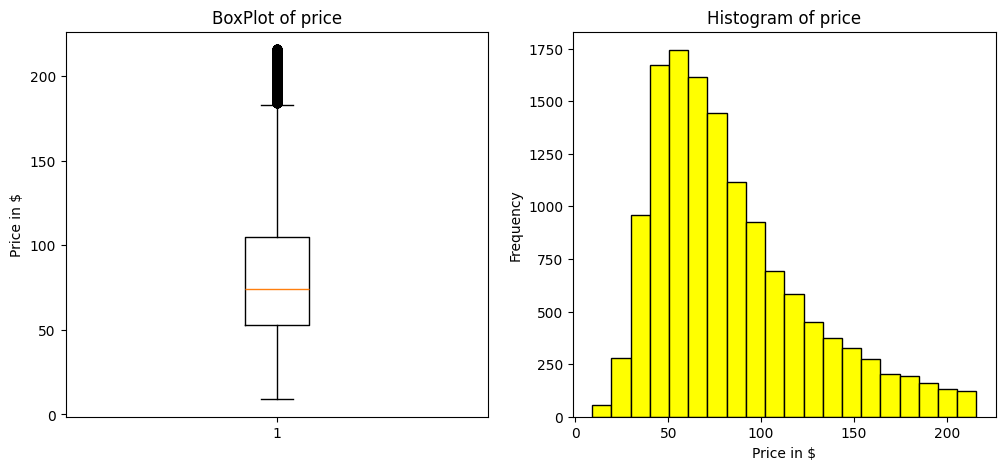

In [14]:
working_class = "price"
price_plot, (plot1, plot2) = plt.subplots(1, 2, figsize = (12,5))

plot1.boxplot(air_data_cl1[working_class].dropna())
plot1.set_title(f"BoxPlot of {working_class}")
plot1.set_xlabel("")
plot1.set_ylabel("Price in $")

plot2.hist(air_data_cl1[working_class].dropna(), color = "yellow", edgecolor = "black", bins = 20)
plot2.set_xlabel("Price in $")
plot2.set_ylabel("Frequency")
plot2.set_title(f"Histogram of {working_class}")

plt.show()

#### 2️⃣ So far we have manually selected our data. We will see which ones will ultimately be the most useful, in order to run machine learning algorithms. Finally, we will compare our results with various metrics

In [15]:
air_data_big  = air_data.copy()

##### ❌ We remove columns that definitely don't give us any useful information from our data frame.

In [16]:
columns_to_drop = ["id",
                   "listing_url",
                   "scrape_id",
                   "host_name",
                   "picture_url",
                   "first_review",
                   "last_review",
                   "license",
                   "calendar_last_scraped",
                   "calendar_updated",
                   "bathrooms_text",
                   "host_about",
                   "neighborhood_overview",
                   "host_thumbnail_url",
                   "host_picture_url",
                   "host_name",
                   "host_since",
                   "host_about",
                   "host_url",
                   "host_id",
                   "neighborhood_overview",
                   "description",
                   "name",
                   "last_scraped",
                   "amenities",
                   "neighbourhood_group_cleansed",
                   "host_verifications",
                   ]

air_data_big1   = air_data_big.drop(columns_to_drop, axis = "columns")
print(air_data_big1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584 entries, 0 to 15583
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   source                                        15584 non-null  object 
 1   host_location                                 10406 non-null  object 
 2   host_response_time                            13812 non-null  object 
 3   host_response_rate                            13812 non-null  float64
 4   host_acceptance_rate                          14550 non-null  object 
 5   host_is_superhost                             14656 non-null  object 
 6   host_neighbourhood                            5748 non-null   object 
 7   host_listings_count                           15572 non-null  float64
 8   host_total_listings_count                     15572 non-null  float64
 9   host_has_profile_pic                          15572 non-null 

##### ❌ The "neighbourhood" and "host_neighbourhood" columns will be removed as they have many null values.

In [17]:
air_data_big1 = air_data_big1.drop(["host_neighbourhood", "neighbourhood"], axis = "columns")

##### ✔️ We take a look at object data, looking at its categories in detail.

In [18]:
object_cols = air_data_big1.select_dtypes(include = "object").columns

for column in object_cols:
    print(f"The {column} column has {air_data_big1[column].nunique()} unique values")

The source column has 2 unique values
The host_location column has 337 unique values
The host_response_time column has 4 unique values
The host_acceptance_rate column has 85 unique values
The host_is_superhost column has 2 unique values
The host_has_profile_pic column has 2 unique values
The host_identity_verified column has 2 unique values
The neighbourhood_cleansed column has 44 unique values
The property_type column has 47 unique values
The room_type column has 4 unique values
The has_availability column has 1 unique values
The instant_bookable column has 2 unique values


##### ❗ It seems that the column 'has_availability' only has one category and doesn't give us any information. So it is deleted. Also the columns 'host_location' and "host_acceptance_rate" have many separate categories, so that thay also removed.

In [19]:
air_data_big1 = air_data_big1.drop(["has_availability", "host_location", "host_acceptance_rate"], axis = "columns")

##### We make use of the function one_hot_thing appropriately

In [20]:
air_data_big1 = air_data_big1.dropna(subset = ["price"])

temp_num2     = air_data_big1.drop(["source",
                                    "host_is_superhost",
                                    "host_has_profile_pic",
                                    "host_identity_verified",
                                    "instant_bookable",
                                    "host_response_time",
                                    "neighbourhood_cleansed",
                                    "property_type",
                                    "room_type"
                                    ], axis = "columns").columns

air_data_big2_final = one_hot_thing(
    air_data_big1,
    ["source", "host_is_superhost", "host_has_profile_pic", "host_identity_verified", "instant_bookable"],
    ["host_response_time", "neighbourhood_cleansed", "property_type", "room_type"],
    temp_num2
)

The final data frame has 145 columns and 14524 rows


##### ❌ Using the outlier_elimination function from before we eliminate the ourliers from the data frame; air_data_big2_final

In [21]:
air_data_big3_final = outlier_elimination(air_data_big2_final, "price")

8.34% of rows has removed


### 🧪 We will run several regression analysis models, aiming to predict the price of each airbnb. We will compare which of the two data frames has retained the most useful information so that we can better train these models.

In [22]:
from   sklearn.model_selection import train_test_split
from   sklearn.linear_model    import LinearRegression
from   sklearn.ensemble        import RandomForestRegressor
from   xgboost                 import XGBRegressor
from   sklearn.metrics         import mean_absolute_error, r2_score

# Training Function
def  models(data_frames, target_col):

    # List of models we will run
    models = {
            "Linear Regression" : LinearRegression(),
            "Random Forest"     : RandomForestRegressor(n_estimators = 100, random_state = 42),
            "XGBoost"           : XGBRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 42)
        }
    all_results = []

    for name, df in data_frames.items():

        X = df.drop(columns = [target_col])
        y = df[target_col]

        # Train-Test split (80% for training and 20% for testing)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

        print(f"== == Running Experiments for the {name} data frame == ==")

        for name, model in models.items():

            # Model training process 
            model.fit(X_train, y_train)

            # Prediction process
            preds = model.predict(X_test)

            # Evaluation of our models
            mae   = mean_absolute_error(y_test, preds)
            r2    = r2_score(y_test, preds)

            all_results.append({
                "Model"    : name,
                "MAE ($)"  : round(mae, 2),
                "R2 Score" : round(r2 , 2)
            })
            print(f"Finished {name} -> MAE; {mae:.2f}$ and R2; {r2 * 100:.2f}")
        print("")
        
    return pd.DataFrame(all_results)

In [ ]:
data_frames = {
    "Manual Selected Data"                     : air_data_cl,
    "Manual Selected Data - no Outliers"       : air_data_cl1,
    "Automated Engineering Data"               : air_data_big2_final,
    "Automated Engineering Data - no Outliers" : air_data_big3_final
}

results     = models(data_frames, "price")

== == Running Experiments for the Manual Selected Data data frame == ==
Finished Linear Regression -> MAE; 71.92$ and R2; 3.78
Finished Random Forest -> MAE; 61.68$ and R2; -14.21
Finished XGBoost -> MAE; 67.34$ and R2; -31.85

== == Running Experiments for the Manual Selected Data - no Outliers data frame == ==
Finished Linear Regression -> MAE; 25.51$ and R2; 32.96
Finished Random Forest -> MAE; 19.03$ and R2; 57.45
Finished XGBoost -> MAE; 19.18$ and R2; 56.86

== == Running Experiments for the Automated Engineering Data data frame == ==
Finished Linear Regression -> MAE; 97.22$ and R2; -6.71
Finished Random Forest -> MAE; 32.90$ and R2; 43.22
Finished XGBoost -> MAE; 33.01$ and R2; 46.81

== == Running Experiments for the Automated Engineering Data - no Outliers data frame == ==
Finished Linear Regression -> MAE; 19.10$ and R2; 59.88
Finished Random Forest -> MAE; 12.02$ and R2; 78.51
Finished XGBoost -> MAE; 10.57$ and R2; 83.31

